<a href="https://colab.research.google.com/github/abidshafee/DataScienceYouTubeTutorials/blob/master/Optimizing_input_params_for_ML_Model_%7C_Categorical_lagends_in_Scatter_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Optimizing input params for ML Model | PCA Scatter Plot with appropriate categorical Legends**
The reason for this approach is not to show you how to build an ML model from scratch, rater we will see here how to prepare (chose) better input parameters for building Machine Learning Model. And we will also see how to draw PCA scatter plot with appropriate Categorical Legends. Because we know that scatter plot shows us spotting outliers in the dataset.

In [2]:
import pandas as pd
import numpy as np
# for dimentionality reduction
from sklearn.decomposition import PCA
# to re-center data to the origin
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
# To Check each parameters Contribution to generate target y
from sklearn.ensemble import ExtraTreesRegressor
#For Plotting
import seaborn as sns
import plotly.express as px # for 3D plot
from matplotlib import pyplot as plt
from matplotlib import style
style.use('ggplot')

**Uploading the Dataset**\
Here, I will be working here with the Breast Cancer dataset

In [3]:
from google.colab import files
file = files.upload()

Saving BreastCancer_data.csv to BreastCancer_data.csv


Reading the dataset into pandas dataframe

In [4]:
df = pd.read_csv('BreastCancer_data.csv',  index_col=False)

As we have previous worked with this dataset, therefore we know it has an empty column

In [5]:
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


Checking null values in the dataframe

In [ ]:
df.isna().sum()

Let's quickly get rid of that 'Unnamed: 32' column

In [7]:
df.dropna(axis=1, inplace=True)

`axis=1` means we have targeted the column that has the null values. check out this [***link>>***](https://https://youtu.be/QStMjyxVkqw) where have shown a complete data cleaning procedure step by step of any given dataset..

In [8]:
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


**Now let seperate the numerical colums for input parameters `X` for building Machine Learning Model.**\
As we can see we have all columns are already numerical therefore, luckily, we don't need go through any extra hassle here. The only categorical column is the 'diagnosis' column that we need to convert into numeric values. Because the values in this column are our targeted outputs **`y`** for each set of input **`X`**.

In [ ]:
df.info()

In [10]:
# input params
X = df.iloc[:, 2:]

In [ ]:
X.head(2)

In [12]:
# output
y = df.iloc[:,1]

In [ ]:
y

In [ ]:
type(y)

**Converting Categorical Diagnosis column to Numeric values**

In [14]:
y = np.where(y=='M', 1, 0)

We could also use sklearn's `LabelEncoder` class to convert Categorical variable to numeric values. See [here>>](https://youtu.be/kW1Sm8S1Jf0)

In [ ]:
type(y)

Lets quickly check the correlation Matrix between input parameters if we have any highly correlated columns in our input parameters.

In [ ]:
corr=X.corr() 
top_corr_features=corr.index 
plt.figure(figsize=(16,16))
#plot heat map 
sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Now, Before dropping the most **correlative features** or parameter, Let's check which parameter contributing how much to predict the target `y`

In [16]:
Contribution = ExtraTreesRegressor()

In [17]:
Contribution.fit(X, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [18]:
result = Contribution.feature_importances_
print('Values are in percentages (%)')
print(str(result*100))

Values are in percentages (%)
[ 3.62395002  1.89504169  5.33470861  2.43616215  0.53571108  0.33359647
  4.31102039 14.50542923  0.27519675  0.24430534  0.71966852  0.31469345
  0.46929049  1.78972914  0.4589522   0.3615012   0.41097783  0.46255184
  0.36082771  0.35634217 11.17228166  2.98801995 13.1067648   7.32097763
  1.89114166  1.08837414  2.49238056 19.37606666  0.71183602  0.65250066]


In [19]:
X.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [ ]:
X.columns[1]

In [31]:
print('Datas in Column: ' + X.columns[1] + ', Contributed >> ' + str(round(result[1]*100, 2)) + '%')

Datas in Column: texture_mean, Contributed >> 1.9%


### **The results in percentage**
**`contributing_params`** is pandas series we have declared below

In [ ]:
n=0
for i in contributing_params.index:
  print(i + ' >> ' + str(round(result[n]*100, 2)) +'%')
  n+=1

radius_mean >> 4.02%
texture_mean >> 1.91%
perimeter_mean >> 4.22%
area_mean >> 2.52%
smoothness_mean >> 0.62%
compactness_mean >> 0.58%
concavity_mean >> 3.78%
concave points_mean >> 11.33%
symmetry_mean >> 0.31%
fractal_dimension_mean >> 0.27%
radius_se >> 0.56%
texture_se >> 0.36%
perimeter_se >> 0.81%
area_se >> 2.19%
smoothness_se >> 0.51%
compactness_se >> 0.47%
concavity_se >> 0.36%
concave points_se >> 0.43%
symmetry_se >> 0.42%
fractal_dimension_se >> 0.24%
radius_worst >> 12.69%
texture_worst >> 3.1%
perimeter_worst >> 17.73%
area_worst >> 6.93%
smoothness_worst >> 1.83%
compactness_worst >> 0.85%
concavity_worst >> 2.51%
concave points_worst >> 17.15%
symmetry_worst >> 0.74%
fractal_dimension_worst >> 0.57%


plot graph of feature importances for better visualization 

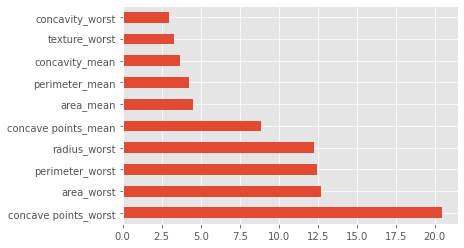

In [ ]:
# let's make a pandas series with the result
# and we declare the cokumn names as its index
contributing_params = pd.Series(result, index=X.columns)
contributing_params_in_percent = pd.Series(result*100, index=X.columns)


# taking 10 largest values from the series of results
nlargest_results = contributing_params_in_percent.nlargest(10)
nlargest_results.plot(kind='barh')
plt.show()

Now let's Drop the Highly correlated columns, those are less important to predict the target `y`

In [ ]:
# X.drop(['radius_mean',	'perimeter_mean', 'area_mean', 'texture_mean'], axis=1, inplace=True)
#X.drop(['texture_mean', 'concave points_mean', 'radius_worst'], axis=1, inplace=True)
#X.drop(['radius_se', 'perimeter_se', 'area_se'], axis=1, inplace=True)
#X.drop(['area_worst'], axis=1, inplace=True)
#X.drop(['compactness_worst', 'concavity_worst'], axis=1, inplace=True)
X.drop(['compactness_mean'], axis=1, inplace=True)

In [ ]:
X.head()

Hence we have now coparetively more cleaner input parameters than we started with before.

In [ ]:
X.shape

(569, 30)

Also we need to go through other anomely detection procedure before training the model with the final dataset. Which we will see in our video on Anomaly detection: [here>>](https://#)

## Standard Deviation std()
standard deviation tells us how fast the datapoint changes from one point to another. Means is there a small variability in the dataset or there is a high variability between datapoint in average. We generally plot Gausian distribution or Normal distribution to plot the variability or data distribution through the dataset

In [37]:
X.columns[4]

'smoothness_mean'

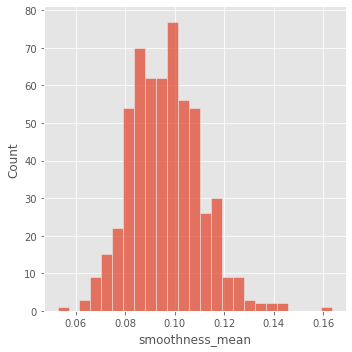

In [36]:
sns.displot(X[X.columns[4]])

# PCA Scatter Plot with approtriate categorical Lagends